<a href="https://colab.research.google.com/github/Shiksha-Yadav/WOC/blob/main/Linear_Regression_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mean squared error for training values: 117287.80634325415
Mean squared error for testing values: 117975.30145878044
Minimum cost value during gradient descent: 0.00019342541140419408


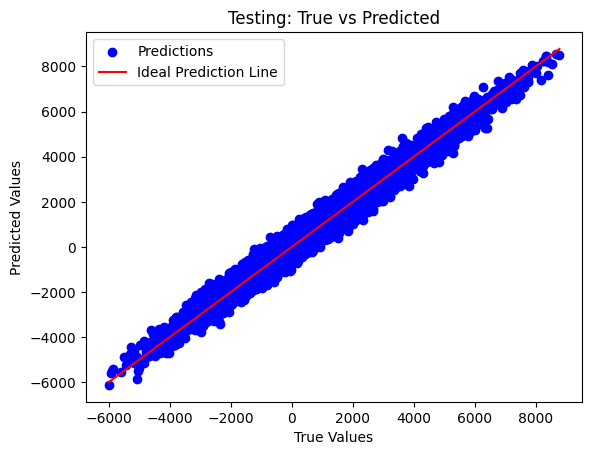

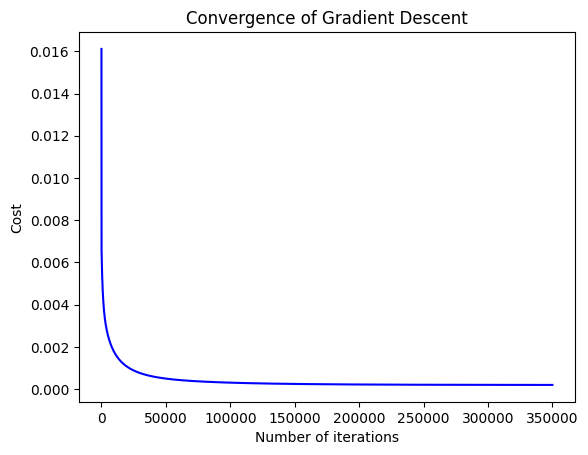

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# loading the dataset
def data(dataset):
  df= pd.read_csv(dataset)
  return df

# normalization of dataset to ensure equal contribution of each feature
def normalizationx(df, min=None, max=None):
  min = df.min() if min is None else min
  max = df.max() if max is None else max
  norm_df= (df-min)/(max-min)
  return norm_df, min, max

def normalizationy(df, min=None, max=None):
  min = df.min() if min is None else min
  max = df.max() if max is None else max
  norm_df= (df-min)/(max-min)
  return norm_df, min, max

# denormalize to get values for test dataset
def denorm(normal_df, max, min):
  return (normal_df*(max-min) + min)

# separate training and testing data
def matrix(df):
  x= df.iloc[1:,1:-1].values # all columns (features) except the last one (target)
  y= df.iloc[1:, -1].values # last column (target)
  test_size= 0.2
  rows = x.shape[0]
  train_size = int(rows * (1 - test_size))
  x_train = x[:train_size]   # First 80% for training
  x_test = x[train_size:]    # Remaining 20% for testing
  y_train = y[:train_size]   # First 80% of target for training
  y_test = y[train_size:]    # Remaining 20% of target for testing
  return x_train, x_test, y_train, y_test

def cost_function(x, y, theta):
  m = len(y)
  predictions = np.dot(x, theta)
  cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
  return cost

def gradient_descent(x, y, theta, alpha, iterations):
  m = len(y)
  cost_history = []
  for _ in range(iterations):
      predictions = np.dot(x, theta)
      errors = predictions - y
      gradients = (1 / m) * np.dot(x.T, errors)
      theta -= alpha * gradients  # Update the parameters
      cost_history.append(cost_function(x, y, theta))
  return theta, cost_history

def intercept(x):
  return np.c_[np.ones(x.shape[0]), x]

def plot(y_true, y_pred, title="Prediction vs True Values"):
  plt.scatter(y_true, y_pred, color='blue', label='Predictions')  # Scatter plot of true vs predicted
  plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red', label='Ideal Prediction Line')  # Ideal line (y=x)
  plt.xlabel('True Values')
  plt.ylabel('Predicted Values')
  plt.title(title)
  plt.legend()
  plt.show()

if __name__ == "__main__":
  dataset = "linear_regression_train1.csv"
  df1= data(dataset) # dataset
  x_train, x_test, y_train, y_test= matrix(df1)
  x_train_norm, min_x, max_x= normalizationx(x_train)
  x_test_norm, _, _= normalizationx(x_test, min_x, max_x)
  y_train_norm, min_y, max_y= normalizationy(y_train)
  y_test_norm, _, _= normalizationy(y_test, min_y, max_y)
  x_train_norm= intercept(x_train_norm)
  x_test_norm= intercept(x_test_norm)
  theta_initial= np.zeros(x_train_norm.shape[1])
  learning_rate=0.1
  iterations=350000
  theta_final, cost_history= gradient_descent(x_train_norm, y_train_norm, theta_initial, learning_rate, iterations)
  y_predict_train= denorm(np.dot(x_train_norm, theta_final), max_y, min_y)
  y_predict_test= denorm(np.dot(x_test_norm, theta_final), max_y, min_y)
  mse_train = np.mean((y_train - y_predict_train) ** 2)
  mse_test = np.mean((y_test - y_predict_test) ** 2)
  print(f"Mean squared error for training values: {mse_train}")
  print(f"Mean squared error for testing values: {mse_test}")
  min_cost = min(cost_history)
  print(f"Minimum cost value during gradient descent: {min_cost}")
  plot(y_test, y_predict_test, title="Testing: True vs Predicted")
  plt.plot(range(len(cost_history)), cost_history, color='blue')
  plt.title("Convergence of Gradient Descent")
  plt.xlabel("Number of iterations")
  plt.ylabel("Cost")
  plt.show()


In [ ]:
df_testdataset= data('linear_regression_test1.csv')
test_ = df_testdataset.iloc[1:,1:].values
x_test1, _, _=normalizationx(test_, min_x, max_x)
x_test1= intercept(x_test1)
y_predict_test= np.dot(x_test1, theta_final)
y_test_denormed = denorm(y_predict_test, max_y, min_y)
print(y_test_denormed)

[ 4476.85144031  4128.93217491 -1318.32072617 ...  5051.39734612
  -196.87607424   513.87392496]
